In [2]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt

#from dotenv import load_dotenv
#load_dotenv()

%matplotlib inline

from MCForecastTools import MCSimulation


Bad key savefig.frameon in file /Users/adnanquaderi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/adnanquaderi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/adnanquaderi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

In [3]:
os.getcwd()

'/Users/adnanquaderi/Desktop/Penn/Project_1_AQ'

In [4]:
# Reading SPY price history
spy_price_csv = Path("SPY.csv")
spy_price = pd.read_csv(
    spy_price_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
spy_price = spy_price.sort_index()
spy_price = spy_price.dropna()
spy_price["Close"] = spy_price["Close"].astype("float")
spy_price = spy_price.rename(columns={"Close": "close"})
spy_price.head(2)

close
Date                       
2015-01-02 16:00:00  205.43
2015-01-05 16:00:00  201.76

In [5]:
# Reset index in SPY data
spy_price_close =  spy_price.reset_index()
spy_price_close["Date"] = spy_price_close["Date"].dt.date
spy_price_close.head(2)

Date   close
0  2015-01-02  205.43
1  2015-01-05  201.76

In [6]:
#Prep SPY prices for input to Monte Carlo function (Multi-index, 2 level for compatability with MC function)

spy_price_MC = spy_price_close
spy_price_MC.set_index("Date", drop=True)
newcols = [
    ("Date", ""), 
    ("SPY", "close")
]
spy_price_MC.columns = pd.MultiIndex.from_tuples(newcols)
spy_price_MC = spy_price_MC.set_index(("Date"))
spy_price_MC 

SPY
             close
Date              
2015-01-02  205.43
2015-01-05  201.76
2015-01-06  199.82
2015-01-07  202.31
2015-01-08  205.90
...            ...
2021-10-25  455.55
2021-10-26  455.96
2021-10-27  453.94
2021-10-28  458.32
2021-10-29  459.25

[1720 rows x 1 columns]

In [7]:
# Reading Ethereum prices from csv file
eth_price_csv = Path("Ethereum.csv")
eth_price = pd.read_csv(
    eth_price_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_price = eth_price.sort_index()
eth_price = eth_price.dropna()
eth_price["Close"] = eth_price["Close"].astype("float")
eth_price = eth_price.rename(columns={"Close": "close"})
eth_price.head(5)

close
Date                      
2016-10-14 23:58:00  11.92
2016-10-15 23:58:00  11.95
2016-10-16 23:58:00  11.95
2016-10-17 23:58:00  11.96
2016-10-18 23:58:00  12.54

In [8]:
#Reset ethereum data index
eth_price_close = eth_price.reset_index()
eth_price_close["Date"] = eth_price_close["Date"].dt.date
eth_price_close.head(2)

Date  close
0  2016-10-14  11.92
1  2016-10-15  11.95

In [9]:
#Prep ETH price for input to Monte Carlo function (Multi-index, 2 level for compatability with MC function)

eth_price_MC = eth_price_close
eth_price_MC.set_index("Date", drop=True)
newcols = [
    ("Date", ""), 
    ("ETH", "close")
]
eth_price_MC.columns = pd.MultiIndex.from_tuples(newcols)
eth_price_MC = eth_price_MC.set_index(("Date"))
eth_price_MC 

ETH
              close
Date               
2016-10-14    11.92
2016-10-15    11.95
2016-10-16    11.95
2016-10-17    11.96
2016-10-18    12.54
...             ...
2021-10-27  3925.44
2021-10-28  4288.26
2021-10-29  4415.04
2021-10-30  4325.43
2021-10-31  4292.06

[1844 rows x 1 columns]

In [10]:
# Get SPY Daily Returns

spy_returns = spy_price.pct_change().dropna()
spy_returns.head(5)

close
Date                         
2015-01-05 16:00:00 -0.017865
2015-01-06 16:00:00 -0.009615
2015-01-07 16:00:00  0.012461
2015-01-08 16:00:00  0.017745
2015-01-09 16:00:00 -0.008014

In [11]:
# Get Ethereum Daily Returns

eth_returns = eth_price.pct_change().dropna().copy()
eth_returns.head(5)

close
Date                         
2016-10-15 23:58:00  0.002517
2016-10-16 23:58:00  0.000000
2016-10-17 23:58:00  0.000837
2016-10-18 23:58:00  0.048495
2016-10-19 23:58:00 -0.042265

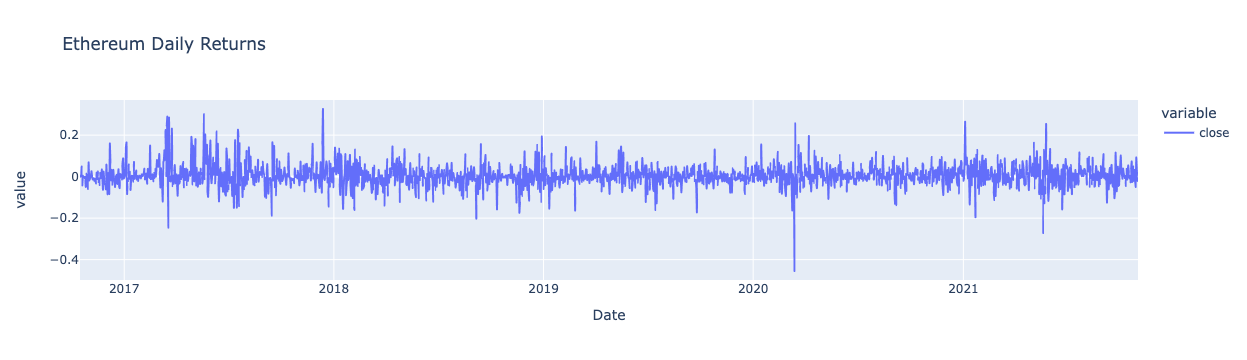

In [12]:
# Plot Ethereum Daily Returns using plotly


px.line(eth_returns, title="Ethereum Daily Returns")

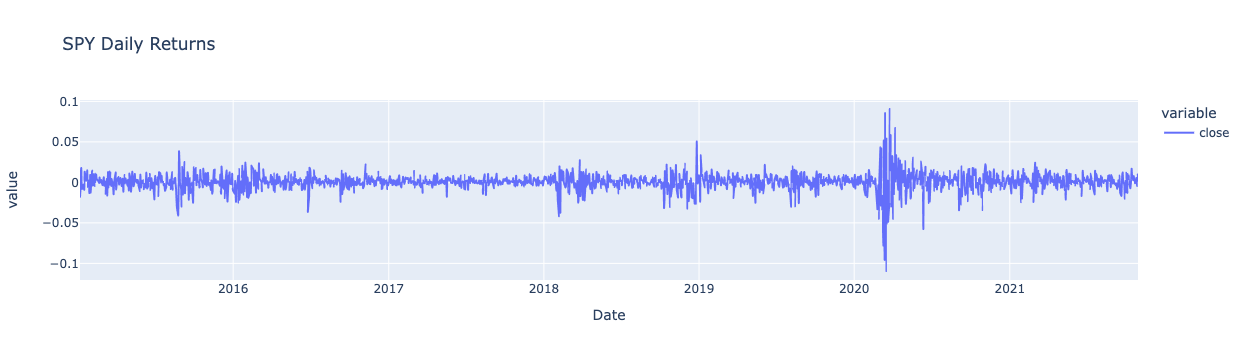

In [13]:
#Plot SPY Daily Returns using plotly

px.line(spy_returns, title="SPY Daily Returns")

In [14]:
# Prepping SPY data for pandas dataframe Concatenation

spy_returns_1 = spy_returns.rename(columns={"close": "SPY"})
spy_returns_1 = spy_returns_1.reset_index()
spy_returns_1["Date"] = spy_returns_1["Date"].dt.date
spy_returns_1 = spy_returns_1.set_index("Date")
spy_returns_1.head(2)

SPY
Date                
2015-01-05 -0.017865
2015-01-06 -0.009615

In [15]:
# Prepping Ethereum data for pandas dataframe Concatenation

eth_returns_1 = eth_returns.rename(columns={"close": "Ethereum"})
eth_returns_1 = eth_returns_1.reset_index()
eth_returns_1["Date"] = eth_returns_1["Date"].dt.date
eth_returns_1 = eth_returns_1.set_index("Date")
eth_returns_1.head(2)

Ethereum
Date                
2016-10-15  0.002517
2016-10-16  0.000000

In [16]:
#BLOCK of code used to Concatenate daily return data


spy_eth_combo_returns = pd.concat([eth_returns_1, spy_returns_1], axis=1, join="outer")
spy_eth_combo_returns.dropna(inplace=True)
spy_eth_combo_returns.head(5)


Ethereum       SPY
Date                          
2016-10-17  0.000837 -0.003472
2016-10-18  0.048495  0.006262
2016-10-19 -0.042265  0.002667
2016-10-20  0.004163 -0.001867
2016-10-21 -0.000829  0.000468

In [17]:
# Blended Portfolio Processing

eth_weight = {
    "Risk_Averse" : 0.02,
    "Moderate" : 0.05,
    "Aggressive" : 0.25
}

print("SPY weight " ,1 - eth_weight['Moderate'])

print("ETH weight ", eth_weight['Moderate'])

SPY weight  0.95
ETH weight  0.05


In [18]:
# Aggressive Portfolio of SPY & Ethereum  (High Crypto Allocation)

spy_eth_combo_returns['Aggressive'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Aggressive'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Aggressive'])



In [19]:
# Moderate Portfolio of SPY & Ethereum (Medium Crypto Allocation)

spy_eth_combo_returns['Moderate'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Moderate'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Moderate'])



In [20]:
# Conservative Portfolio of SPY & Ethereum (Low Crypto Allocation)

spy_eth_combo_returns['Risk_Averse'] = spy_eth_combo_returns['Ethereum'] * eth_weight['Risk_Averse'] + spy_eth_combo_returns['SPY'] * (1- eth_weight['Risk_Averse'])



In [21]:
spy_eth_combo_returns.head(3)

Ethereum       SPY  Aggressive  Moderate  Risk_Averse
Date                                                             
2016-10-17  0.000837 -0.003472   -0.002395 -0.003257    -0.003386
2016-10-18  0.048495  0.006262    0.016821  0.008374     0.007107
2016-10-19 -0.042265  0.002667   -0.008566  0.000421     0.001769

<AxesSubplot:title={'center':'SPY, Ethereum, and Portfolio Daily Return Box Plots'}>

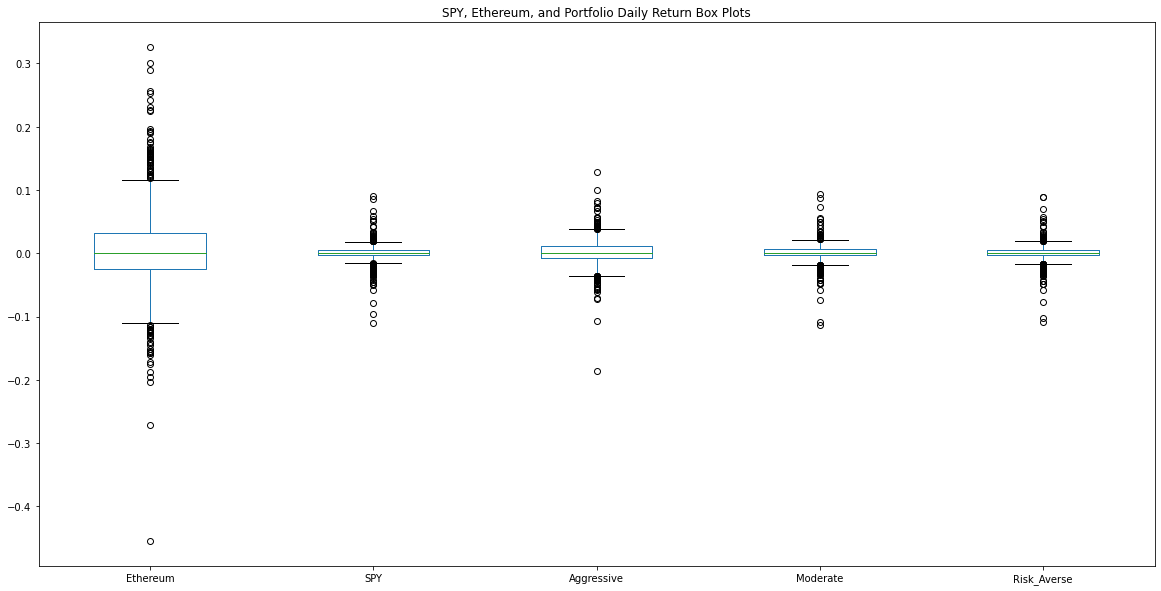

In [22]:
# Box Plot of Daily Returns 

spy_eth_combo_returns.plot.box(figsize=(20, 10), title="SPY, Ethereum, and Portfolio Daily Return Box Plots") 


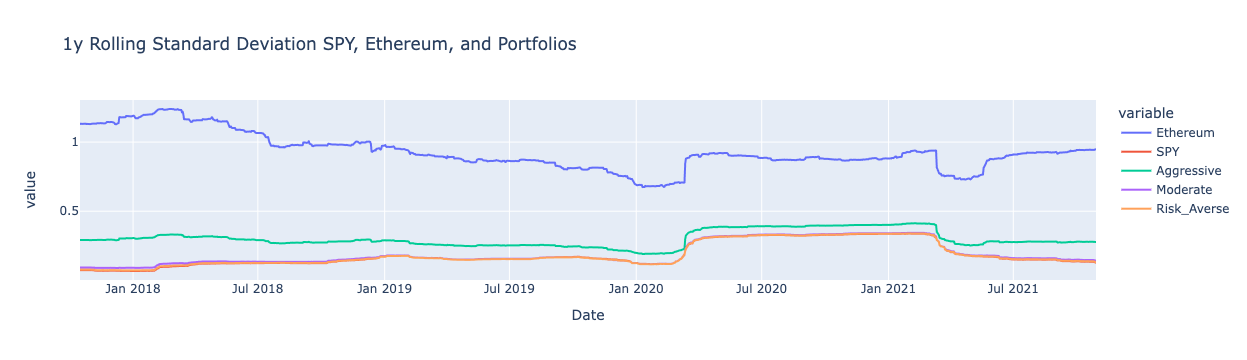

In [23]:
# SPY, Ethereum, Portfolio Rolling 1y Volatility (std)

spy_eth_combo_returns_1 = spy_eth_combo_returns.std() * np.sqrt(252)
spy_eth_combo_returns_1 = (np.sqrt(252)*spy_eth_combo_returns).rolling(window=252).std().dropna()


px.line(spy_eth_combo_returns_1, title="1y Rolling Standard Deviation SPY, Ethereum, and Portfolios")

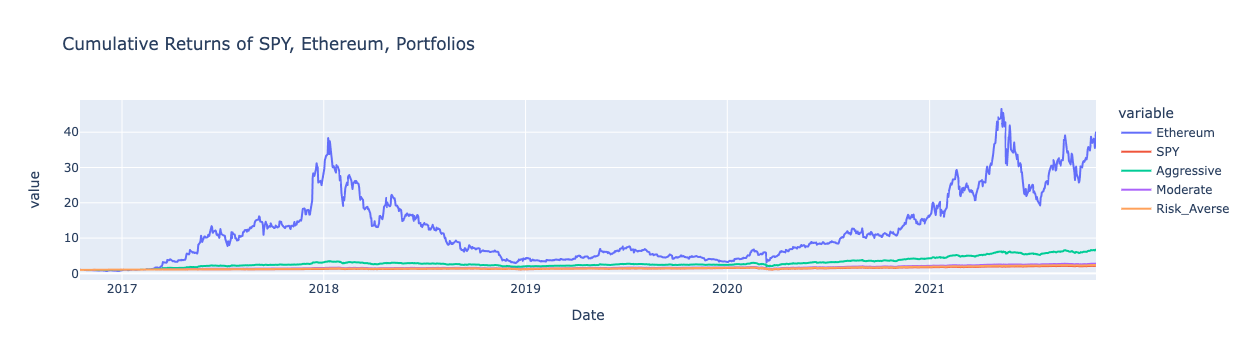

In [24]:
# Cumulative Return calculation and plot

spy_eth_combo_cum_returns_1 = (1+spy_eth_combo_returns).cumprod()
#spy_eth_combo_cum_returns_1 = spy_eth_combo_returns).rolling(window=252).std().dropna()


px.line(spy_eth_combo_cum_returns_1, title="Cumulative Returns of SPY, Ethereum, Portfolios")




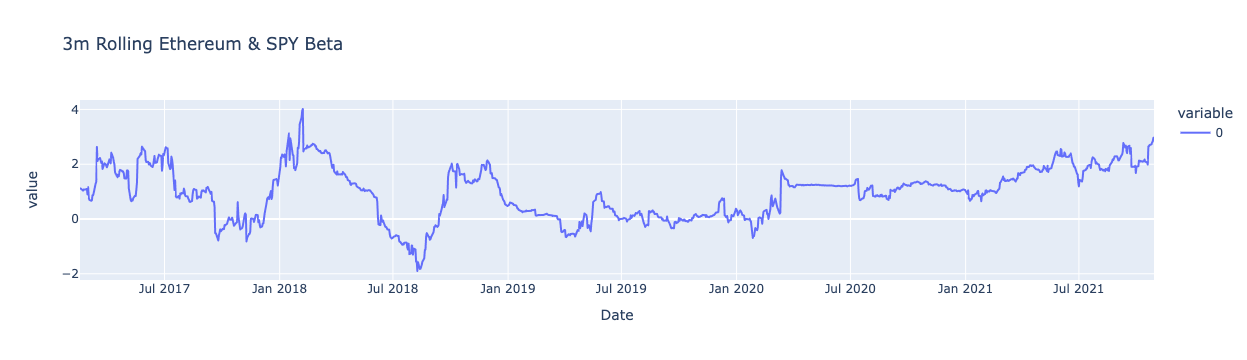

In [25]:
# Calculate Rolling 3 month Covariances against SPY

covariance_eth = spy_eth_combo_returns["Ethereum"].rolling(window=85).cov(spy_eth_combo_returns["SPY"]).dropna()

covariance_aggressive= spy_eth_combo_returns["Aggressive"].rolling(window=85).cov(spy_eth_combo_returns["SPY"]).dropna()
covariance_moderate= spy_eth_combo_returns["Moderate"].rolling(window=85).cov(spy_eth_combo_returns["SPY"]).dropna()
covariance_risk_averse= spy_eth_combo_returns["Risk_Averse"].rolling(window=85).cov(spy_eth_combo_returns["SPY"]).dropna()

# Calculate Rolling 3 month variance of S&P 
variance_spy = spy_eth_combo_returns["SPY"].rolling(window=85).var().dropna()


# Calculate Rolling Beta

beta_eth = covariance_eth / variance_spy

beta_aggressive = covariance_aggressive / variance_spy
beta_moderate = covariance_moderate / variance_spy
beta_risk_averse= covariance_risk_averse / variance_spy

# Plot selected beta trend

px.line(beta_eth, title="3m Rolling Ethereum & SPY Beta")


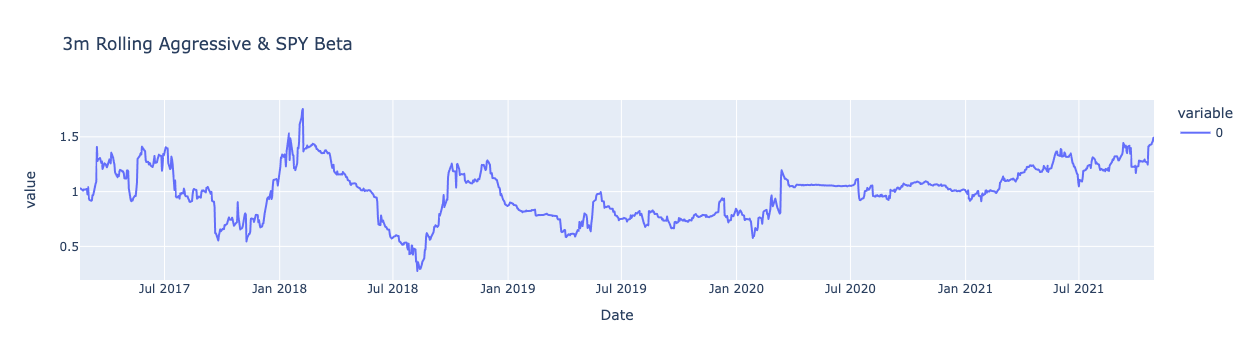

In [26]:
px.line(beta_aggressive, title="3m Rolling Aggressive & SPY Beta")

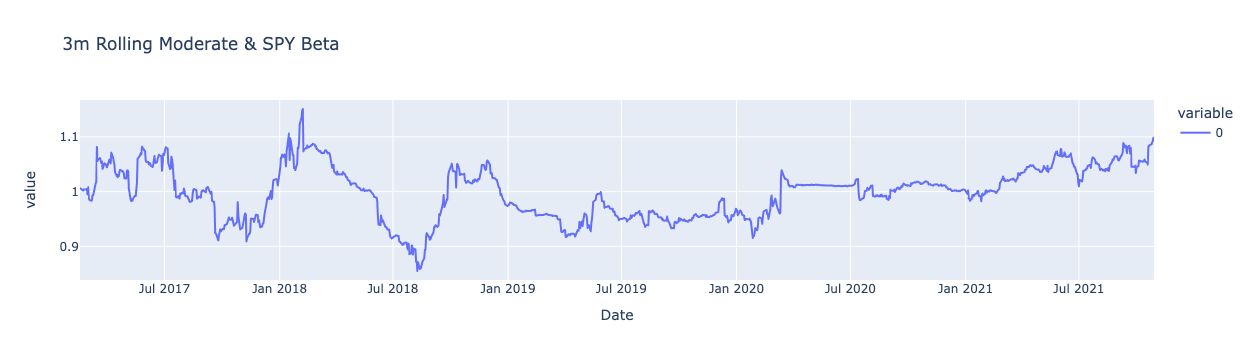

In [27]:
px.line(beta_moderate, title="3m Rolling Moderate & SPY Beta")

## ------------  Monte Carlo # 1 Ethereum -----------------

In [28]:
# Create Monte Carlo function object

num_sims = 100
MC_Eth_new= MCSimulation(
    portfolio_data = eth_price_MC,
    num_simulation = num_sims,
    num_trading_days = 252*1
)

In [29]:
# Run Monte Carlo simulations to forecast one year daily returns

MC_Eth_new.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.047475  1.118927  1.050444  0.998596  1.042110  1.041413  0.979374   
2    0.978367  1.154273  1.145492  1.040030  1.094206  0.983681  1.067306   
3    1.006980  1.318536  1.140476  1.050436  1.036343  0.958366  1.042645   
4    1.010541  1.408559  1.088733  0.952610  1.007015  0.944571  0.998894   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.881856  1.981444  2.995314  3.279060  2.010877  1.242057  4.735520   
249  2.196591  2.139361  3.235458  3.229439  2.039713  1.211683  4.348936   
250  2.061622  1.882115  3.249397  3.275881  2.052166  1.295380  4.469734   
251  2.002301  2.015079  3.466215  3.238962  1.949455  1.420373  4.568306   
252  1.873463  2.027739  3.484860  3.260983  1.809047  1.545654  4.824822   

           7         8         9   ...        90        91        92  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.012294  1.029512  1.036788  ...  0.916490  0.884004  0.986316   
2    0.948875  1.002817  1.072201  ...  0.917633  0.958843  1.073875   
3    0.927540  0.974274  0.981571  ...  0.862427  1.008696  1.201530   
4    0.931842  0.942878  0.988308  ...  0.894025  0.940989  1.187599   
..        ...       ...       ...  ...       ...       ...       ...   
248  6.344958  0.968815  0.636800  ...  1.153022  1.544089  4.694007   
249  5.943310  0.977564  0.621261  ...  1.145382  1.466915  4.742005   
250  6.408811  0.877757  0.703033  ...  1.166978  1.520007  4.667532   
251  6.281616  0.872230  0.779005  ...  1.108314  1.656007  4.271729   
252  6.141095  0.916309  0.732782  ...  1.111844  1.693610  4.152508   

           93        94        95        96        97        98        99  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.957412  1.020299  1.006117  1.031209  1.005404  1.005025  0.959319  
2    0.953249  0.990348  1.068204  1.027155  1.034085  1.004988  0.928911  
3    0.879254  0.939903  1.146585  1.007113  1.018283  0.941736  0.943333  
4    0.960112  0.976426  1.202784  1.008579  0.991261  0.952838  1.012094  
..        ...       ...       ...       ...       ...       ...       ...  
248  6.016907  0.196123  0.734686  2.740532  4.126974  2.035357  2.309158  
249  5.392871  0.197856  0.710083  2.797420  4.011887  1.961196  2.307237  
250  4.702027  0.191773  0.794261  2.957211  4.347063  1.921330  2.126516  
251  4.514723  0.190630  0.846626  2.599668  4.592422  1.872673  2.297190  
252  4.198866  0.190066  0.897312  2.658371  4.844077  1.834962  2.475309  

[253 rows x 100 columns]

In [30]:
# Compute summary statistics from the simulated daily returns

simulated_eth_returns_data = {
    "Mean": list(MC_Eth_new.simulated_return.mean(axis=1)),
    "Median": list(MC_Eth_new.simulated_return.median(axis=1)),
    "Min": list(MC_Eth_new.simulated_return.min(axis=1)),
    "Max": list(MC_Eth_new.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics

df_simulated_eth_returns = pd.DataFrame(simulated_eth_returns_data)

# Display sample data

df_simulated_eth_returns.head()



Mean    Median       Min       Max
0  1.000000  1.000000  1.000000  1.000000
1  0.996907  1.001217  0.839810  1.157618
2  0.999296  0.991009  0.798950  1.166014
3  1.002570  0.993623  0.803352  1.318536
4  1.000958  0.987477  0.789534  1.408559

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Ethereum Over the Next Year'}>

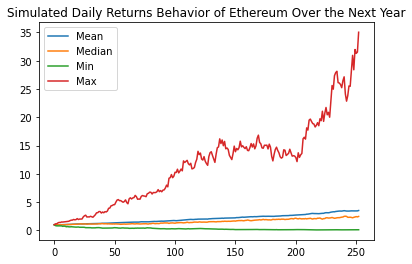

In [31]:
# Plot simulated returns over next year


df_simulated_eth_returns.plot(title="Simulated Daily Returns Behavior of Ethereum Over the Next Year")


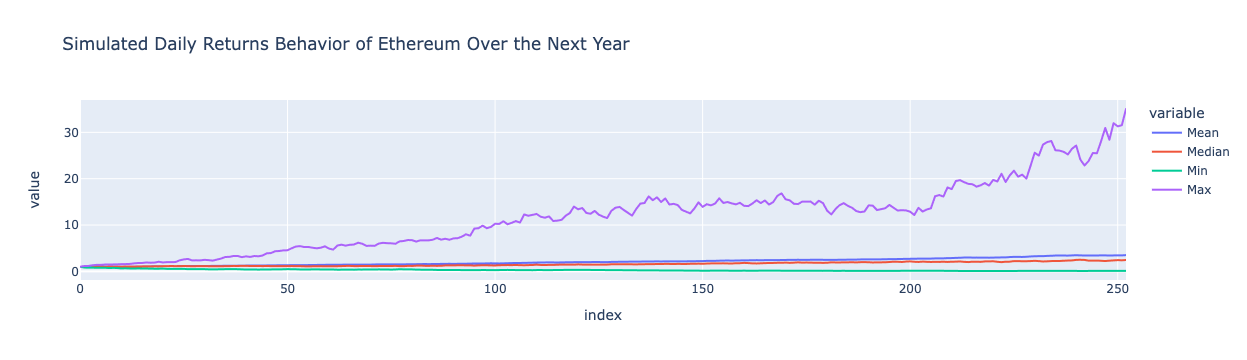

In [32]:
# Plot simulated returns over next year using plotly

px.line(df_simulated_eth_returns, title="Simulated Daily Returns Behavior of Ethereum Over the Next Year")



In [33]:
# Fetch summary statistics from the Monte Carlo simulation results

eth_tbl = MC_Eth_new.summarize_cumulative_return()

# Print summary statistics
print(eth_tbl)


count           100.000000
mean              3.514261
std               4.491357
min               0.112941
25%               1.123418
50%               2.463314
75%               4.442328
max              35.040135
95% CI Lower      0.243119
95% CI Upper     12.863152
Name: 252, dtype: float64


In [34]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Ethereum

eth_ci_lower = round(eth_tbl[8]*10000,2)
eth_ci_upper = round(eth_tbl[9]*10000,2)

# Print results

print(f"There is a 95% chance that an initial investment of $10,000 in Ethereum"
      f" over the next year will end within in the range of"
      f" ${eth_ci_lower} and ${eth_ci_upper}.")


There is a 95% chance that an initial investment of $10,000 in Ethereum over the next year will end within in the range of $2431.19 and $128631.52.


## ----- Monte Carlo # 2 - SPY ------------

In [38]:
# Create Monte Carlo function object for SPY

num_sims_2 = 100

MC_SPY_new= MCSimulation(
    portfolio_data = spy_price_MC,
    num_simulation = num_sims_2,
    num_trading_days = 252*1
)

In [39]:
# Run Monte Carlo simulations to forecast one year daily returns for SPY

MC_SPY_new.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.989423  1.011144  0.982785  0.988427  1.004131  1.000518  0.996002   
2    1.000736  1.008879  0.998536  0.982824  0.998452  1.005709  0.990390   
3    0.998904  1.028281  1.013317  0.999679  0.991072  1.008099  0.980658   
4    1.001129  1.029154  1.005722  0.990801  0.999819  0.994413  0.970783   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.056952  1.033158  1.026444  1.329181  1.277788  1.387881  0.839764   
249  1.063680  1.044471  1.026793  1.319837  1.280086  1.390089  0.848345   
250  1.088664  1.047966  1.025257  1.330788  1.274861  1.386683  0.850089   
251  1.091199  1.039981  1.025501  1.353762  1.271588  1.388600  0.847099   
252  1.084902  1.041062  1.020303  1.341981  1.257573  1.397633  0.844424   

           7         8         9   ...        90        91        92  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.993335  0.995774  0.986311  ...  0.998522  1.000827  0.997019   
2    0.989426  1.004546  0.992625  ...  0.996650  0.996654  1.000022   
3    0.994919  0.995098  0.997702  ...  0.989101  0.996733  1.019457   
4    0.994785  0.989607  0.983771  ...  0.986334  0.984904  1.014573   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.864453  0.901487  1.161303  ...  1.140788  1.081352  1.093515   
249  0.867474  0.896449  1.173108  ...  1.157064  1.095498  1.100905   
250  0.863983  0.884741  1.182214  ...  1.149872  1.103147  1.104800   
251  0.871959  0.882885  1.169889  ...  1.157456  1.109531  1.105601   
252  0.876959  0.876722  1.174492  ...  1.167191  1.092565  1.123453   

           93        94        95        96        97        98        99  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.988571  1.007184  1.018807  0.984246  0.981470  1.000367  0.991832  
2    0.981867  1.002806  1.012846  0.995284  0.986996  0.996423  0.981286  
3    0.963742  0.996093  1.028250  1.000167  0.983614  1.006489  0.965458  
4    0.981323  1.005787  1.009510  1.011452  0.994713  1.002274  0.977516  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.106541  1.043326  1.100650  1.137923  1.289130  0.972430  1.210578  
249  1.104239  1.039838  1.097028  1.136989  1.270910  0.966888  1.243842  
250  1.106768  1.044264  1.105124  1.125333  1.264903  0.966463  1.257005  
251  1.106124  1.034761  1.096730  1.095656  1.253569  0.978985  1.263685  
252  1.099588  1.030403  1.083299  1.097574  1.220923  0.997908  1.251840  

[253 rows x 100 columns]

In [50]:
# Compute summary statistics from the simulated daily returns for SPY

simulated_spy_returns_data = {
    "Mean": list(MC_SPY_new.simulated_return.mean(axis=1)),
    "Median": list(MC_SPY_new.simulated_return.median(axis=1)),
    "Min": list(MC_SPY_new.simulated_return.min(axis=1)),
    "Max": list(MC_SPY_new.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for SPY

df_simulated_spy_returns = pd.DataFrame(simulated_spy_returns_data)

# Display sample data for SPY

df_simulated_spy_returns.head(10)



Mean    Median       Min       Max
0  1.000000  1.000000  1.000000  1.000000
1  0.997703  0.998452  0.976289  1.022667
2  0.995894  0.995161  0.970563  1.039756
3  0.996021  0.993628  0.963663  1.041058
4  0.994236  0.991365  0.949376  1.043953
5  0.996918  0.998453  0.951215  1.065125
6  0.997190  1.001335  0.931723  1.061474
7  0.995749  0.999999  0.934322  1.062548
8  0.993654  0.995437  0.908237  1.070032
9  0.995165  0.993202  0.924763  1.076406

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of SPY Over the Next Year'}>

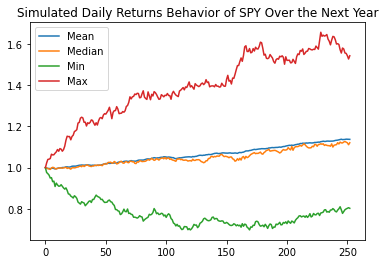

In [44]:
# Plot simulated returns over next year for SPY

df_simulated_spy_returns.plot(title="Simulated Daily Returns Behavior of SPY Over the Next Year")


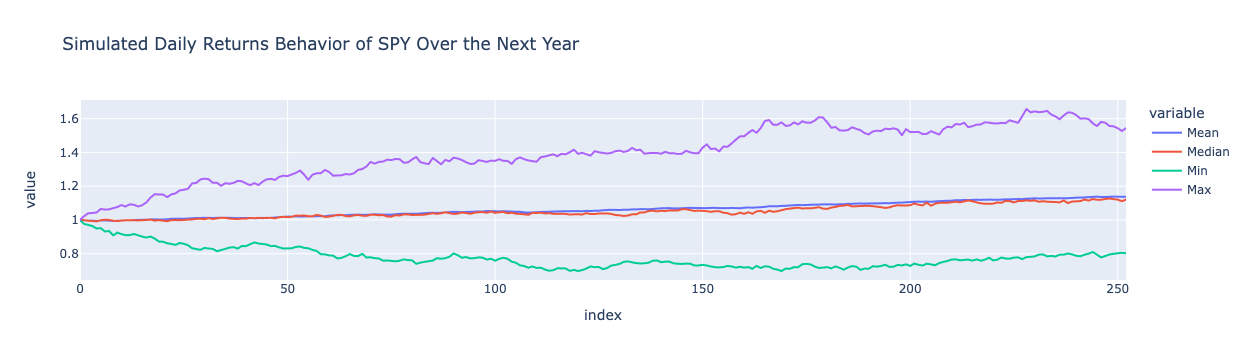

In [45]:
# Plot simulated returns over next year using plotly for SPY

px.line(df_simulated_spy_returns, title="Simulated Daily Returns Behavior of SPY Over the Next Year")



In [46]:
# Fetch summary statistics from the Monte Carlo simulation results for SPY

spy_tbl = MC_SPY_new.summarize_cumulative_return()

# Print summary statistics
print(spy_tbl)


count           100.000000
mean              1.137281
std               0.181706
min               0.802290
25%               1.005553
50%               1.120654
75%               1.257906
max               1.543415
95% CI Lower      0.826794
95% CI Upper      1.503473
Name: 252, dtype: float64


In [49]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in SPY

spy_ci_lower = round(spy_tbl[8]*10000,2)
spy_ci_upper = round(spy_tbl[9]*10000,2)

# Print results

print(f"There is a 95% chance that an initial investment of $10,000 in SPY"
      f" over the next year will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")


There is a 95% chance that an initial investment of $10,000 in SPY over the next year will end within in the range of $8267.94 and $15034.73.
